In [1]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

#df1 is for Student test and mannwhitneyu test

df = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar13/colon_cancer_tumor_vs_normal_unpaired_FPKM.tsv', sep = '\t', index_col = 0)

df['p-value unpair'] = [ttest_ind(df.loc[gene].iloc[0:5], df.loc[gene].iloc[5:10])[1] for gene in df.index]
df['p-value mannwhitneyu'] = [mannwhitneyu(df.loc[gene].iloc[0:5], df.loc[gene].iloc[5:10])[1] for gene in df.index]

[Text(0, 0, 'C17orf96'),
 Text(1, 0, 'IER5L'),
 Text(2, 0, 'FUT1'),
 Text(3, 0, 'CDH3'),
 Text(4, 0, 'FXYD5'),
 Text(5, 0, 'ZNHIT2'),
 Text(6, 0, 'CLCA4'),
 Text(7, 0, 'ACADSB'),
 Text(8, 0, 'MT1F'),
 Text(9, 0, 'PIGN')]

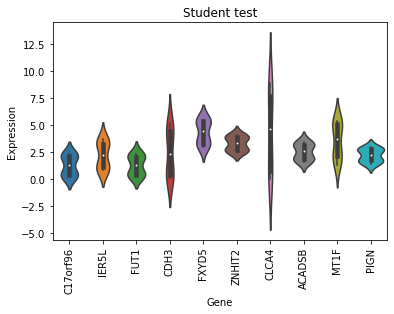

In [2]:
df = df.sort_values(by =  ['p-value unpair'])
df1 = df.head(10)
plt.tight_layout()

#Student test

genes1 = df1.index
df1 = df1.drop(['p-value unpair', 'p-value mannwhitneyu'], axis = 1)
df1 = df1.T
df1 = df1.melt(var_name = 'Gene', value_name = 'Expression')
a = sns.violinplot(data = df1, y = 'Expression', x = 'Gene')
a.set_title('Student test')
a.set_xticklabels(a.get_xticklabels(),rotation=90)

[Text(0, 0, 'SFTA2'),
 Text(1, 0, 'CTD-2147F2.1'),
 Text(2, 0, 'RAET1L'),
 Text(3, 0, 'LINC00460'),
 Text(4, 0, 'AC007128.1'),
 Text(5, 0, 'RP5-884M6.1'),
 Text(6, 0, 'CST1'),
 Text(7, 0, 'VAC14-AS1'),
 Text(8, 0, 'LINC00858'),
 Text(9, 0, 'RP11-399O19.9')]

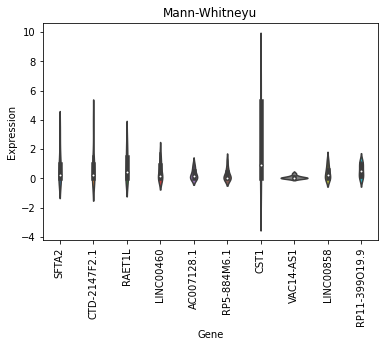

In [3]:
df = df.sort_values(by = ['p-value mannwhitneyu'])
df2 = df.head(10)
plt.tight_layout()


#Mann-Whitneyu

genes2 = df2.index
df2 = df2.drop(['p-value unpair', 'p-value mannwhitneyu'], axis = 1)
df2 = df2.T
df2 = df2.melt(var_name = 'Gene', value_name = 'Expression')
a = sns.violinplot(data = df2, y = 'Expression', x = 'Gene')
a.set_title('Mann-Whitneyu')
a.set_xticklabels(a.get_xticklabels(),rotation=90)

In [4]:
common1 = list(set(genes1) & set(genes2))
common1

[]

DESeq2 анализ я сделала в R, в результате получила следующее:

In [5]:
df2 = pd.read_csv('/Users/mariiazelenskaia/Desktop/учеба👩🏻‍🔬/BiF💻/hw13/condition_treated_results.csv', index_col = 0)

In [6]:
df2

,baseMean,log2FoldChange,lfcSE,pvalue,padj
FABP6,538.975977,7.593254,0.599428,2.229382e-38,3.701666e-34
ETV4,2955.925092,6.270791,0.521190,1.303693e-34,1.082326e-30
IER5L,467.200061,3.154899,0.282495,4.098579e-30,2.268427e-26
KRT80,1009.985050,8.018150,0.724864,1.153207e-29,4.786961e-26
FUT1,262.907787,3.344228,0.321265,1.334136e-26,4.430398e-23
...,...,...,...,...,...
ZFAND2A,1236.201944,0.486216,0.594784,NaN,NaN
ZNF503-AS1,101.070857,0.259340,0.556945,NaN,NaN
ZNF580,843.509372,1.175772,0.506859,NaN,NaN
ZNF74,610.065463,1.749282,0.583634,NaN,NaN


In [7]:
df2 = df2.sort_values(by = 'padj').head(10)

In [8]:
df2

,baseMean,log2FoldChange,lfcSE,pvalue,padj
FABP6,538.975977,7.593254,0.599428,2.229382e-38,3.701666e-34
ETV4,2955.925092,6.270791,0.521190,1.303693e-34,1.082326e-30
IER5L,467.200061,3.154899,0.282495,4.098579e-30,2.268427e-26
KRT80,1009.985050,8.018150,0.724864,1.153207e-29,4.786961e-26
FUT1,262.907787,3.344228,0.321265,1.334136e-26,4.430398e-23
C17orf96,228.654403,3.524831,0.342902,6.986417e-26,1.933375e-22
CLDN1,2113.982853,5.379469,0.531060,2.316228e-25,5.494094e-22
ATG9B,249.176667,4.651234,0.465712,1.008252e-24,2.092626e-21
KIAA1257,127.977054,4.456401,0.458575,1.466916e-23,2.687224e-20
SLC51B,1123.923186,-3.886818,0.399952,1.618420e-23,2.687224e-20


In [9]:
genes3 = df2.index

Student and DESeq2:

In [10]:
common2 = list(set(genes3) & set(genes1))
common2

['FUT1', 'IER5L', 'C17orf96']

Mann-Whitneyu and DESeq2:

In [11]:
common3 = list(set(genes2) & set(genes3))
common3

[]

In [12]:
df2 = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar13/colon_cancer_tumor_vs_normal_unpaired_counts.tsv', index_col = 0, sep = '\t')
df2 = df2.loc[df2.index.intersection(genes3)]

In [13]:
df2

,TCGA-A6-2682-01A,TCGA-A6-2683-01A,TCGA-A6-2685-01A,TCGA-A6-2686-01A,TCGA-A6-5662-01A,TCGA-A6-5667-11A,TCGA-AA-3489-11A,TCGA-AA-3496-11A,TCGA-AA-3511-11A,TCGA-AA-3514-11A
ATG9B,43,268,325,1018,817,29,19,23,32,16
C17orf96,154,195,291,554,669,48,45,18,95,39
CLDN1,645,1377,1316,3380,18446,115,108,102,146,142
ETV4,1193,3374,1830,5003,18381,76,47,117,144,76
FABP6,356,977,413,722,1203,8,8,9,3,5
FUT1,169,192,421,697,645,85,48,63,62,38
IER5L,266,312,767,1155,1388,99,136,93,107,167
KIAA1257,86,133,72,598,267,14,13,12,22,9
KRT80,531,652,785,956,8381,18,5,7,19,0
SLC51B,46,41,110,238,222,2501,2352,1645,1630,5935


[Text(0, 0, 'ATG9B'),
 Text(1, 0, 'C17orf96'),
 Text(2, 0, 'CLDN1'),
 Text(3, 0, 'ETV4'),
 Text(4, 0, 'FABP6'),
 Text(5, 0, 'FUT1'),
 Text(6, 0, 'IER5L'),
 Text(7, 0, 'KIAA1257'),
 Text(8, 0, 'KRT80'),
 Text(9, 0, 'SLC51B')]

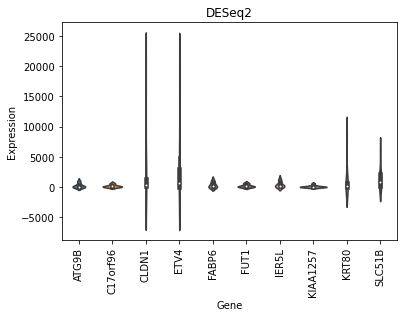

In [14]:
plt.tight_layout()

df2 = df2.T.melt(var_name = 'Gene', value_name = 'Expression')
a = sns.violinplot(data = df2, y = 'Expression', x = 'Gene')
a.set_title('DESeq2')
a.set_xticklabels(a.get_xticklabels(),rotation=90)